# Exploratory Data Analysis

**Created By : Tommy Septians**<br>
**Dataset : application{train|test}.csv**

## Import Necessary Python Library

In [235]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Setting Data Visualization Styles

In [238]:
sns.set(rc = {'figure.figsize' : (20.7, 8.27)})
sns.set_style('whitegrid')
sns.color_palette('dark')
plt.style.use('fivethirtyeight')

## Force Display All Data

In [241]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Load Dataset into Dataframe

In [280]:
df_test  = pd.read_csv('D:/Abrar/RAKAMIN_Data_Science/Finpro/application_test.csv')
df_train = pd.read_csv('D:/Abrar/RAKAMIN_Data_Science/Finpro/application_train.csv')

## View Data Samples

In [282]:
df_test.sample(5, random_state = 0)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
17014,223197,Cash loans,F,N,Y,0,117000.0,630000.0,32296.5,630000.0,"Spouse, partner",Working,Higher education,Married,With parents,0.028663,-13922,-3692,-8012.0,-4939,NaN,1,1,0,1,0,1,Core staff,2.0,2,2,WEDNESDAY,9,0,0,0,0,0,0,Kindergarten,NaN,0.466105,0.411849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0,4.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4925,135591,Cash loans,F,N,Y,0,202500.0,675000.0,36747.0,675000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.014520,-18474,-1951,-6206.0,-1607,NaN,1,1,0,1,1,1,Sales staff,2.0,2,2,SATURDAY,9,0,0,0,0,1,1,Business Entity Type 3,NaN,0.260932,0.533482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-306.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
32247,334756,Cash loans,F,Y,Y,1,121500.0,450000.0,23107.5,450000.0,NaN,Commercial associate,Higher education,Married,House / apartment,0.018209,-16433,-3939,-4367.0,-4367,23.0,1,1,0,1,0,1,Accountants,3.0,3,3,MONDAY,7,0,0,0,0,0,0,Business Entity Type 3,0.514785,0.354315,0.251239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,3.0,1.0,-2581.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
15582,212448,Cash loans,M,Y,Y,0,225000.0,765000.0,39060.0,765000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.007020,-164

In [283]:
df_train.sample(5, random_state = 0)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
42962,149741,1,Cash loans,F,N,N,0,117000.0,417024.0,20191.5,360000.0,"Spouse, partner",Working,Incomplete higher,Married,House / apartment,0.020246,-21774,-2125,-4611.0,-4653,NaN,1,1,1,1,1,0,Security staff,2.0,3,3,FRIDAY,13,0,0,0,0,0,0,Medicine,0.484936,0.182710,0.145543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-2008.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
227307,363290,0,Cash loans,M,N,Y,0,450000.0,640080.0,31261.5,450000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.046220,-18499,-2055,-3052.0,-2028,NaN,1,1,0,1,0,0,Laborers,2.0,1,1,TUESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.624574,0.669053,0.680139,0.3763,0.4482,0.9950,NaN,NaN,0.48,0.2069,0.6250,NaN,0.0347,NaN,0.4585,NaN,0.0050,0.3834,0.4651,0.9950,NaN,NaN,0.4834,0.2069,0.6250,NaN,0.0355,NaN,0.4777,NaN,0.0052,0.3799,0.4482,0.9950,NaN,NaN,0.48,0.2069,0.6250,NaN,0.0353,NaN,0.4667,NaN,0.0051,NaN,block of flats,0.4524,Panel,No,0.0,0.0,0.0,0.0,-728.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
290035,436006,0,Revolving loans,M,Y,Y,0,450000.0,900000.0,45000.0,900000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.010643,-18084,-4159,-8525.0,-1616,4.0,1,1,0,1,0,0,Managers,1.0,2,2,SUNDAY,14,0,0,0,0,0,0,Construction,NaN,0.454279,0.173527,0.1113,0.0852,0.9836,0.7756,0.0189,0.12,0.1034,0.3333,0.3750,0.0932,0.0908,0.1128,0.0077,0.0047,0.1134,0.0884,0.9836,0.7844,0.0191,0.1208,0.1034,0.3333,0.3750,0.0954,0.0992,0.1175,0.0078,0.0050,0.1124,0.0852,0.9836,0.7786,0.0190,0.12,0.1034,0.3333,0.3750,0.0949,0.0923,0.1148,0.0078,0.0048,reg oper sp

## View Data Summary

In [285]:
list_item_test = []
for col in df_test.columns :
    list_item_test.append([col, df_test[col].dtype, df_test[col].count(), df_test[col].isna().sum(),
                           100 * df_test[col].isna().sum() / len(df_test[col]),
                           df_test[col].nunique(), df_test[col].unique()])
desc_df_test = pd.DataFrame(data = list_item_test, columns = ['feature', 'data_type', 'fill_num', 'null_num', 'null_persen', 'unique_num', 'unique_sample'])
desc_df_test.head()

,feature,data_type,fill_num,null_num,null_persen,unique_num,unique_sample
0,SK_ID_CURR,int64,48744,0,0.0,48744,"[100001, 100005, 100013, 100028, 100038, 10004..."
1,NAME_CONTRACT_TYPE,object,48744,0,0.0,2,"[Cash loans, Revolving loans]"
2,CODE_GENDER,object,48744,0,0.0,2,"[F, M]"
3,FLAG_OWN_CAR,object,48744,0,0.0,2,"[N, Y]"
4,FLAG_OWN_REALTY,object,48744,0,0.0,2,"[Y, N]"


In [286]:
list_item_train = []
for col in df_train.columns :
    list_item_train.append([col, df_train[col].dtype, df_train[col].count(), df_train[col].isna().sum(),
                            100 * df_train[col].isna().sum() / len(df_train[col]),
                            df_train[col].nunique(), df_train[col].unique()])
desc_df_train = pd.DataFrame(data = list_item_train, columns = ['feature', 'data_type', 'fill_num', 'null_num', 'null_persen', 'unique_num', 'unique_sample'])
desc_df_train.head()

,feature,data_type,fill_num,null_num,null_persen,unique_num,unique_sample
0,SK_ID_CURR,int64,307511,0,0.0,307511,"[100002, 100003, 100004, 100006, 100007, 10000..."
1,TARGET,int64,307511,0,0.0,2,"[1, 0]"
2,NAME_CONTRACT_TYPE,object,307511,0,0.0,2,"[Cash loans, Revolving loans]"
3,CODE_GENDER,object,307511,0,0.0,3,"[M, F, XNA]"
4,FLAG_OWN_CAR,object,307511,0,0.0,2,"[N, Y]"


## Concat Dataframes

In [288]:
# df_train.drop('TARGET', axis = 1, inplace = True)
# df_master = pd.concat([df_test, df_train], ignore_index = True)

df_master = df_train.filter(items = df_train.columns[:16])
df_master.sample(5, random_state = 0)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE
42962,149741,1,Cash loans,F,N,N,0,117000.0,417024.0,20191.5,360000.0,"Spouse, partner",Working,Incomplete higher,Married,House / apartment
227307,363290,0,Cash loans,M,N,Y,0,450000.0,640080.0,31261.5,450000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment
290035,436006,0,Revolving loans,M,Y,Y,0,450000.0,900000.0,45000.0,900000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment
239833,377703,0,Cash loans,M,Y,N,1,360000.0,1125000.0,33025.5,1125000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment
76427,188624,0,Cash loans,M,Y,Y,0,675000.0,835380.0,42840.0,675000.0,Unaccompanied,Working,Incomplete higher,Single / not married,With parents


## 1. Descriptive Statistics

In [290]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           307511 non-null  int64  
 1   TARGET               307511 non-null  int64  
 2   NAME_CONTRACT_TYPE   307511 non-null  object 
 3   CODE_GENDER          307511 non-null  object 
 4   FLAG_OWN_CAR         307511 non-null  object 
 5   FLAG_OWN_REALTY      307511 non-null  object 
 6   CNT_CHILDREN         307511 non-null  int64  
 7   AMT_INCOME_TOTAL     307511 non-null  float64
 8   AMT_CREDIT           307511 non-null  float64
 9   AMT_ANNUITY          307499 non-null  float64
 10  AMT_GOODS_PRICE      307233 non-null  float64
 11  NAME_TYPE_SUITE      306219 non-null  object 
 12  NAME_INCOME_TYPE     307511 non-null  object 
 13  NAME_EDUCATION_TYPE  307511 non-null  object 
 14  NAME_FAMILY_STATUS   307511 non-null  object 
 15  NAME_HOUSING_TYPE

In [291]:
# Deskripsi di atas tidak muncul keseluruhan, sehingga menggunakan alternatif lain
list_item = []
for col in df_master.columns :
    list_item.append([col, df_master[col].dtype, df_master[col].count(), df_master[col].isna().sum(),
                      100 * df_master[col].isna().sum() / len(df_master[col]),
                      df_master[col].nunique(), df_master[col].unique()])
desc_df = pd.DataFrame(data = list_item, columns = ['feature', 'data_type', 'fill_num', 'null_num', 'null_persen', 'unique_num', 'unique_sample'])
desc_df#[(desc_df['data_type'] == 'object')]

,feature,data_type,fill_num,null_num,null_persen,unique_num,unique_sample
0,SK_ID_CURR,int64,307511,0,0.000000,307511,"[100002, 100003, 100004, 100006, 100007, 10000..."
1,TARGET,int64,307511,0,0.000000,2,"[1, 0]"
2,NAME_CONTRACT_TYPE,object,307511,0,0.000000,2,"[Cash loans, Revolving loans]"
3,CODE_GENDER,object,307511,0,0.000000,3,"[M, F, XNA]"
4,FLAG_OWN_CAR,object,307511,0,0.000000,2,"[N, Y]"
5,FLAG_OWN_REALTY,object,307511,0,0.000000,2,"[Y, N]"
6,CNT_CHILDREN,int64,307511,0,0.000000,15,"[0, 1, 2, 3, 4, 7, 5, 6, 8, 9, 11, 12, 10, 19,..."
7,AMT_INCOME_TOTAL,float64,307511,0,0.000000,2548,"[202500.0, 270000.0, 67500.0, 135000.0, 121500..."
8,AMT_CREDIT,float64,307511,0,0.000000,5603,"[406597.5, 1293502.5, 135000.0, 312682.5, 5130..."
9,AMT_ANNUITY,float64,307499,12,0.003902,13672,"[24700.5, 35698.5, 6750.0, 29686.5, 21865.5, 2..."


In [292]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           307511 non-null  int64  
 1   TARGET               307511 non-null  int64  
 2   NAME_CONTRACT_TYPE   307511 non-null  object 
 3   CODE_GENDER          307511 non-null  object 
 4   FLAG_OWN_CAR         307511 non-null  object 
 5   FLAG_OWN_REALTY      307511 non-null  object 
 6   CNT_CHILDREN         307511 non-null  int64  
 7   AMT_INCOME_TOTAL     307511 non-null  float64
 8   AMT_CREDIT           307511 non-null  float64
 9   AMT_ANNUITY          307499 non-null  float64
 10  AMT_GOODS_PRICE      307233 non-null  float64
 11  NAME_TYPE_SUITE      306219 non-null  object 
 12  NAME_INCOME_TYPE     307511 non-null  object 
 13  NAME_EDUCATION_TYPE  307511 non-null  object 
 14  NAME_FAMILY_STATUS   307511 non-null  object 
 15  NAME_HOUSING_TYPE

In [302]:
df_master['TARGET'] = df_master['TARGET'].astype(object)

In [304]:
# Buang Kolom Primary Key
df_master.drop('SK_ID_CURR', axis = 1, inplace=True)

In [306]:
df_master[df_master.duplicated(keep = False) == True].head(5)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment
9,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment
17,0,Revolving loans,F,N,Y,1,81000.0,270000.0,13500.0,270000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment
25,0,Cash loans,F,N,Y,0,90000.0,225000.0,11074.5,225000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment
38,0,Cash loans,F,N,Y,0,99000.0,247275.0,17338.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment


### View Statistical Summary

In [311]:
numeric = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']


df_nums = df_master.select_dtypes(include = numeric)
df_cats = df_master.select_dtypes(include = 'object')

print(df_nums.columns)
print(df_cats.columns)

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE'],
      dtype='object')
Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE'],
      dtype='object')


In [37]:
from IPython.display import display, HTML

display(HTML('<center><b><h3>Statistics Description of Dataset</h3></b></center><center><b><h5>Numerical Features</h5></b></center>'))
display(df_nums.describe())

display(HTML('<center><b><h3>Statistics Description of Dataset</h3></b></center><center><b><h5>Categorical Features</h5></b></center>'))
display(df_cats.describe())

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
count,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05
mean,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05
std,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05
min,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04
25%,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05
50%,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05
75%,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05
max,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE
count,307511,307511,307511,307511,307511,306219,307511,307511,307511,307511
unique,2,2,3,2,2,7,8,5,6,6
top,0,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment
freq,282686,278232,202448,202924,213312,248526,158774,218391,196432,272868


- Seluruh kolom memiliki tipe data yang sesuai
- Ada 3 kolom yang memiliki data yang kosong: AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE
- ada beberapa kolom yang memiliki nilai summary aneh:
    - max(outlier): CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE
    - top(mode): NAME_CONTRACT_TYPE(Cash loans), CODE_GENDER(F), FLAG_OWN_CAR(N), FLAG_OWN_REALTY(Y), NAME_TYPE_SUITE(Unaccompanied), NAME_EDUCATION_TYPE(Secondary / secondary special), NAME_FAMILY_STATUS(Married), NAME_HOUSING_TYPE(House / apartment)

## 2. Univariate Analysis

### Hisplot

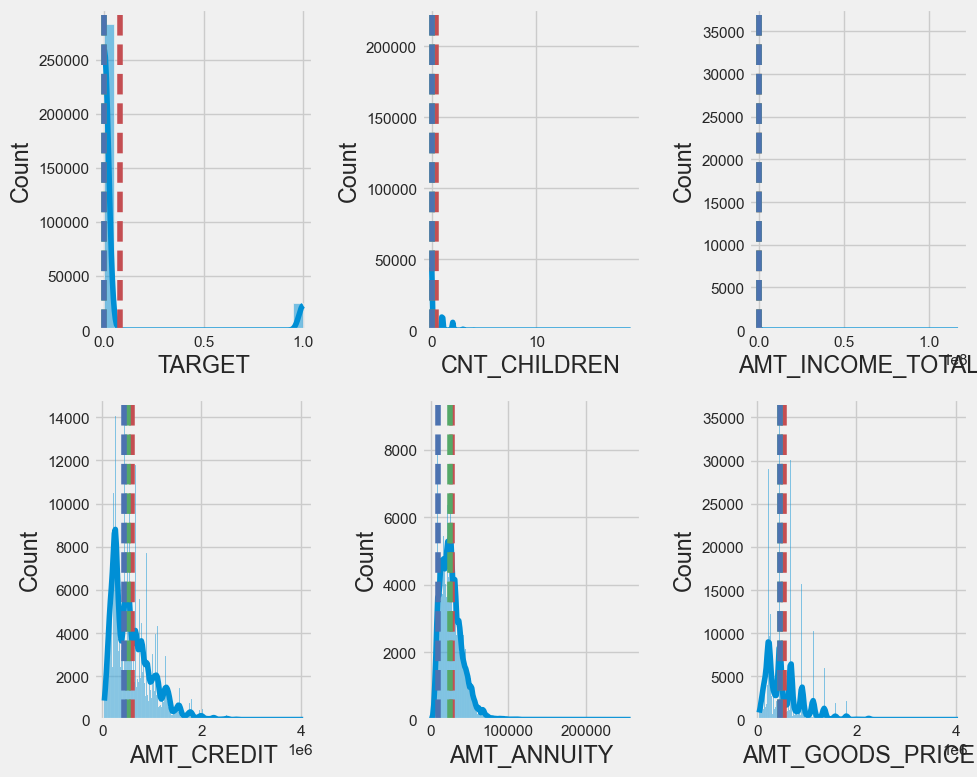

In [282]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 8))
for i, col in enumerate(df_nums.columns[1:]):
    mean_val   = df_nums[col].mean()
    median_val = df_nums[col].median()
    mode_val   = df_nums[col].mode()[0]

    sns.histplot(data = df_nums, x = col, ax = axes[i//3, i%3], kde = True)

    axes[i//3, i%3].axvline(x = mean_val, color = 'r', linestyle = 'dashed', label = 'Mean')
    axes[i//3, i%3].axvline(x = median_val, color = 'g', linestyle = 'dashed', label = 'Median')
    axes[i//3, i%3].axvline(x = mode_val, color = 'b', linestyle = 'dashed', label = 'Mode')
plt.tight_layout()
plt.show()


### Bos & Violin plot

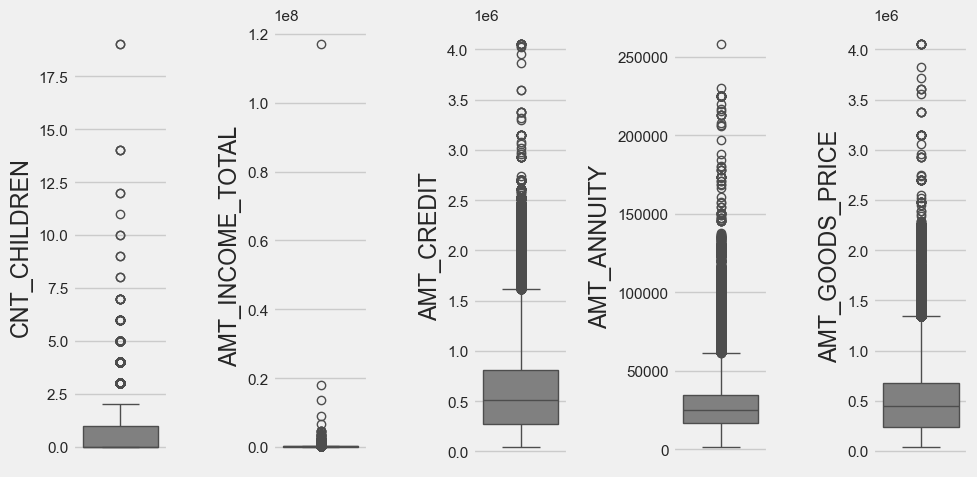

In [290]:
fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (10,5))
for i, col in enumerate(df_nums.columns[2:]):
    sns.boxplot(data = df_nums, y = col, ax = axes[i], color = 'gray', orient = 'v')

plt.tight_layout()
plt.show()

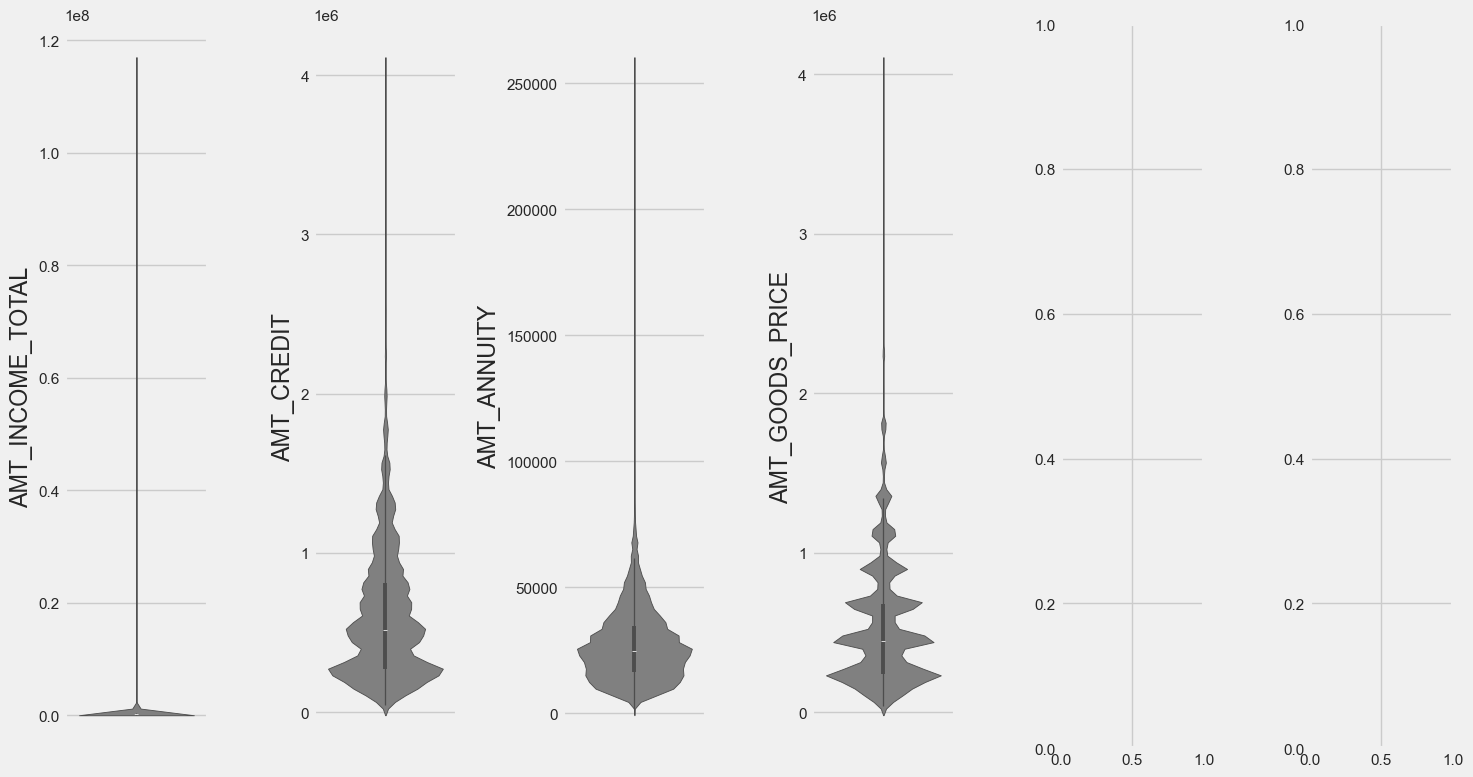

In [44]:
fig, axes = plt.subplots(nrows = 1, ncols = 6, figsize = (15, 8))
for i, col in enumerate(df_nums.columns[1:]):
    sns.violinplot(data = df_master, y = col, ax = axes[i], color = 'gray', orient = 'v')

plt.tight_layout()
plt.show()

### Countplot

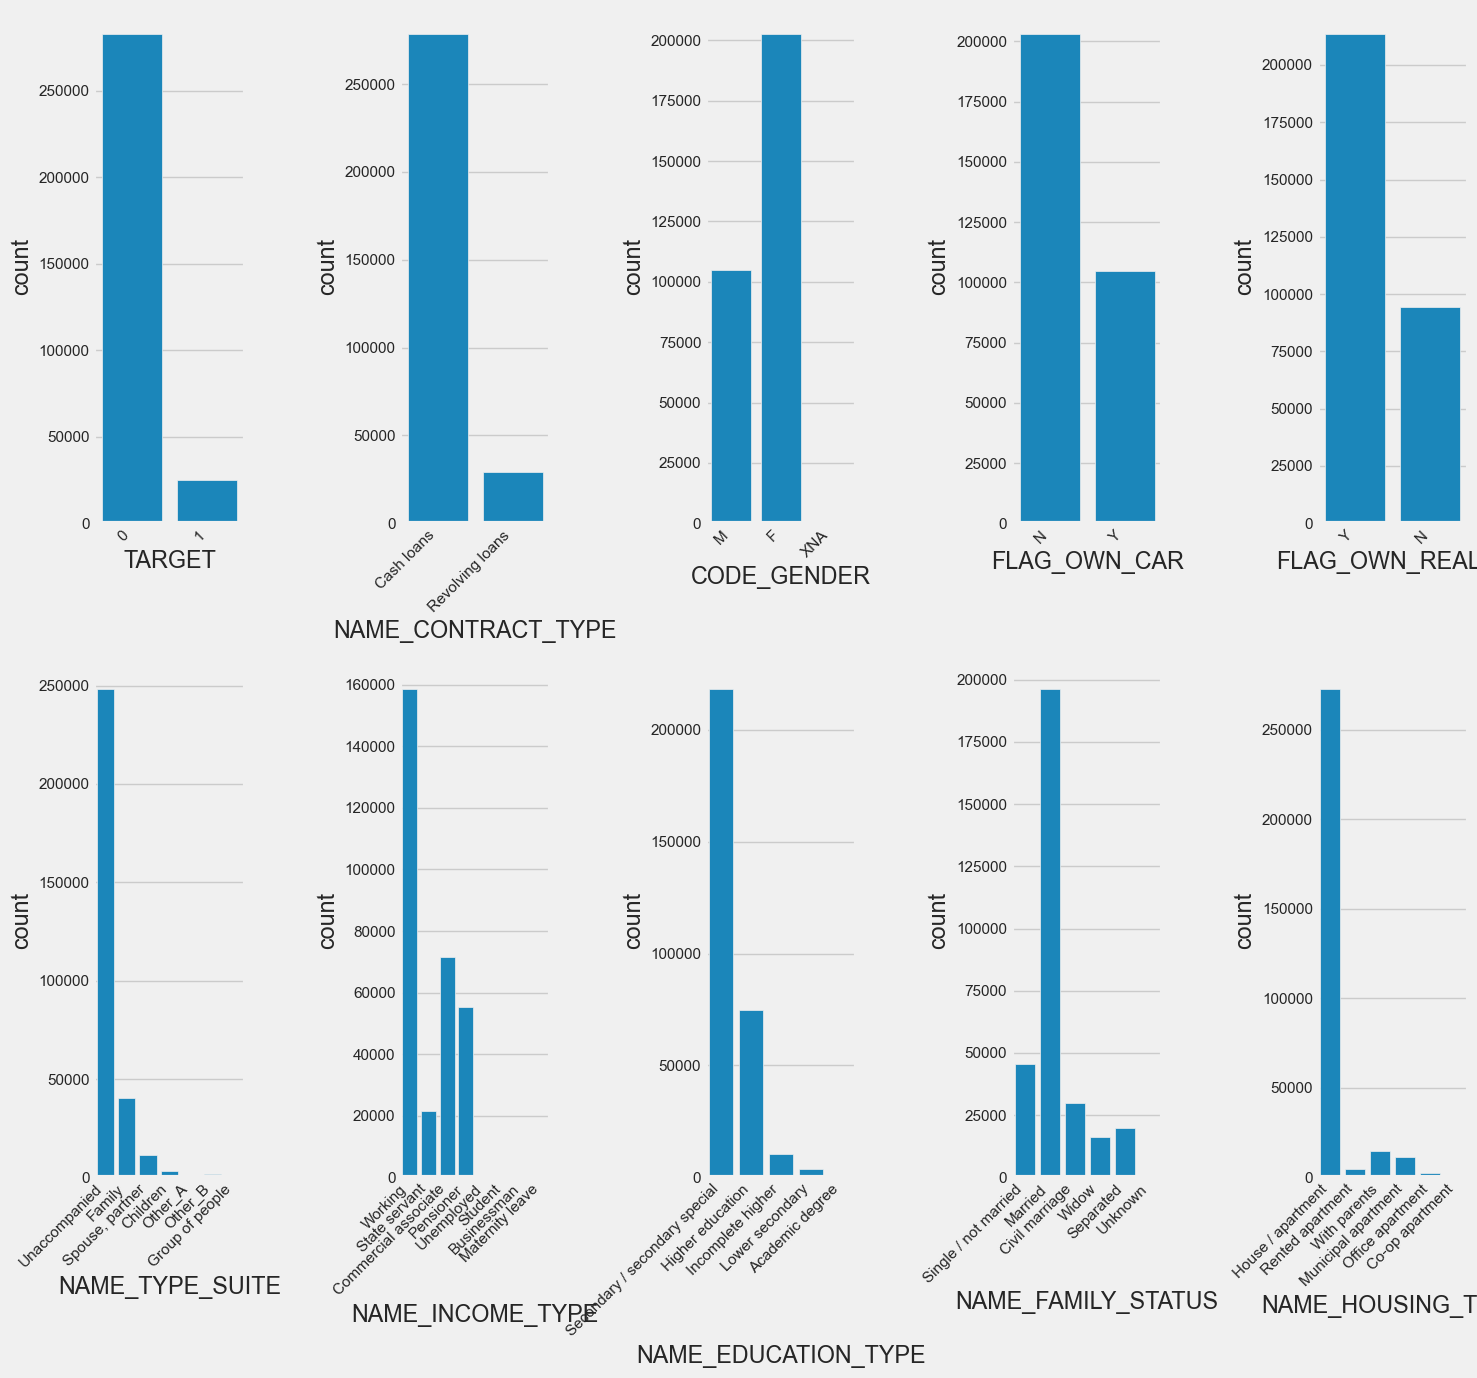

In [235]:
# Barchart Distribusi Category
fig, ax = plt.subplots(2, 5, figsize=(15,14))

for i in range(0, len(df_cats.columns)):
    axi = sns.countplot(data=df_cats , x= df_cats.columns[i], ax= ax[i//5, i%5], orient='h')
    axi.set_xticklabels(axi.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

- hampir ke 5 fitur memiliki distribusi positive skewed
- setiap fitur memiliki nilai outlier
- untuk tipe data int juga memiliki nilai yang mendominasi.
- kategori yang mendominasi pada tipe object(mode): NAME_CONTRACT_TYPE(Cash loans), CODE_GENDER(F), FLAG_OWN_CAR(N), FLAG_OWN_REALTY(Y), NAME_TYPE_SUITE(Unaccompanied), NAME_EDUCATION_TYPE(Secondary / secondary special), NAME_FAMILY_STATUS(Married), NAME_HOUSING_TYPE(House / apartment)

## 3. Multivariate Analysis

### Heatmap

<Axes: >

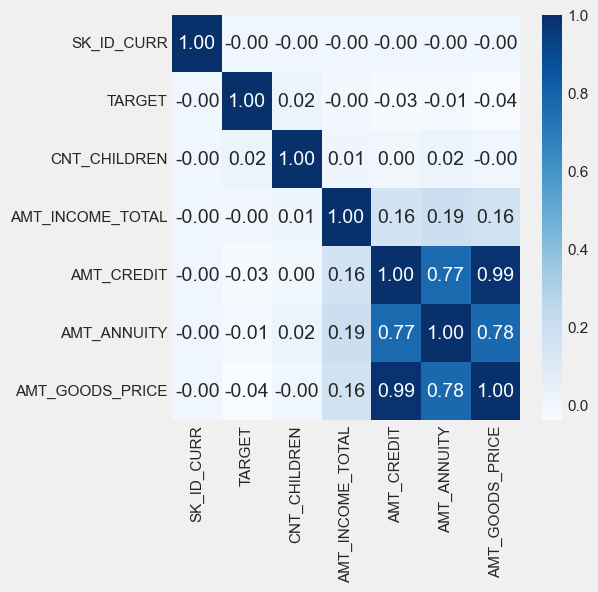

In [293]:
plt.figure(figsize = (5, 5))
sns.heatmap(df_nums.corr(), cmap = 'Blues', annot = True, fmt = '.2f') #fmt: show decimal value
# plt.savefig('correlation_df_nums.jpg', dpi = 100, bbox_inches = 'tight', pad_inches = 0)

### Pairplot

<Figure size 800x800 with 0 Axes>

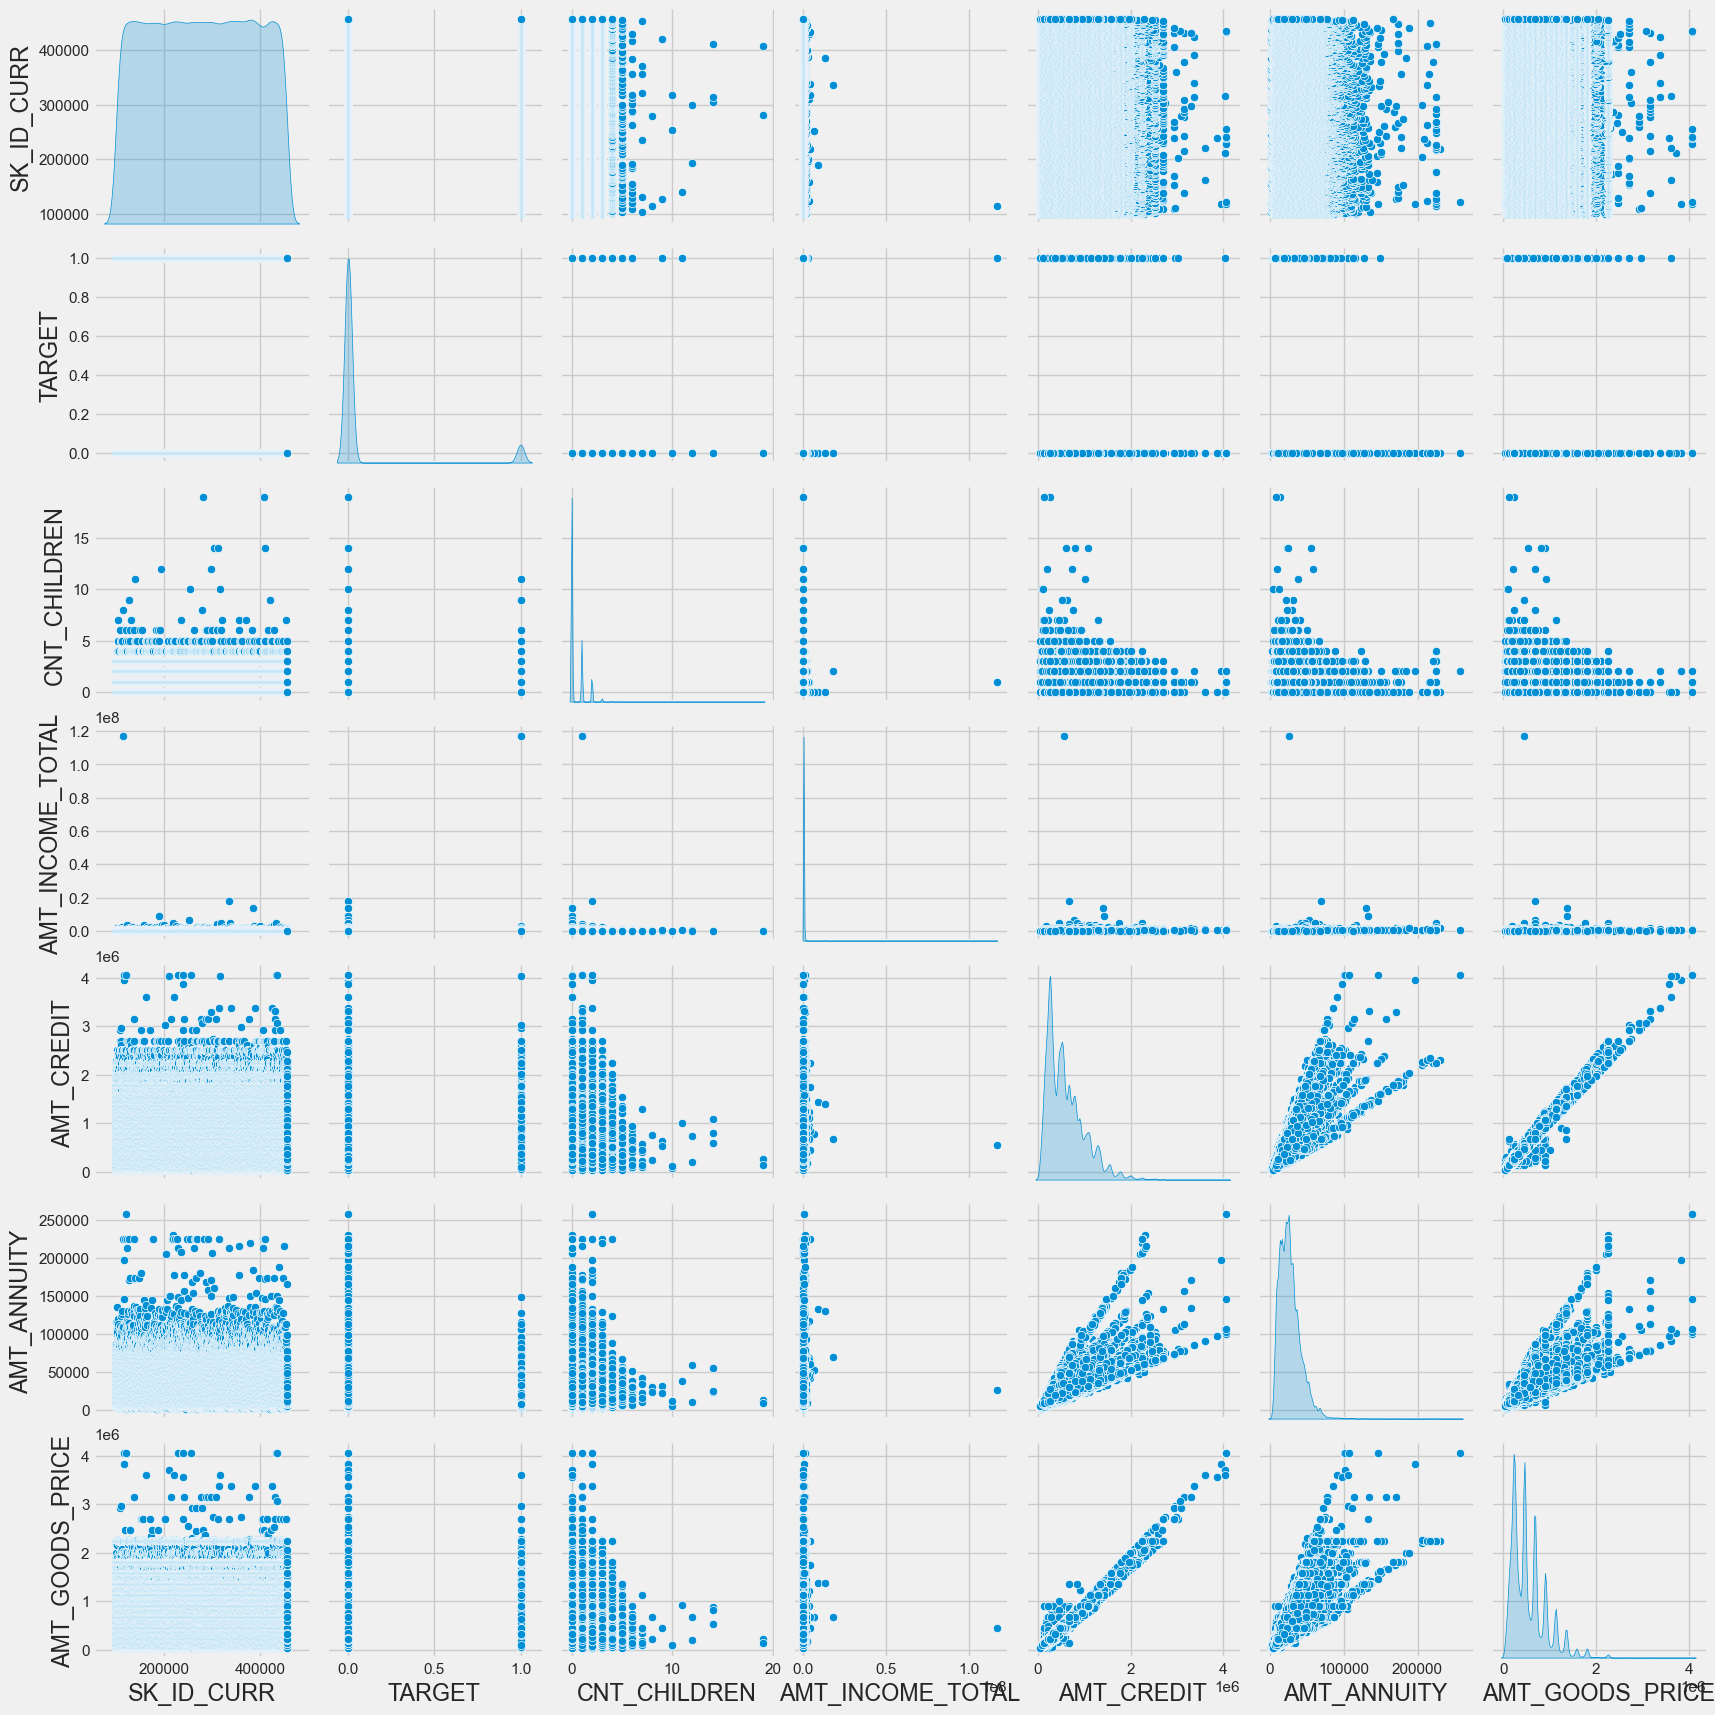

In [292]:
plt.figure(figsize=(8, 8))
sns.pairplot(df_master, diag_kind='kde')
plt.savefig('scatter_plot_df_nums.jpg', dpi = 100, bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [47]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TARGET               307511 non-null  object 
 1   NAME_CONTRACT_TYPE   307511 non-null  object 
 2   CODE_GENDER          307511 non-null  object 
 3   FLAG_OWN_CAR         307511 non-null  object 
 4   FLAG_OWN_REALTY      307511 non-null  object 
 5   CNT_CHILDREN         307511 non-null  int64  
 6   AMT_INCOME_TOTAL     307511 non-null  float64
 7   AMT_CREDIT           307511 non-null  float64
 8   AMT_ANNUITY          307499 non-null  float64
 9   AMT_GOODS_PRICE      307233 non-null  float64
 10  NAME_TYPE_SUITE      306219 non-null  object 
 11  NAME_INCOME_TYPE     307511 non-null  object 
 12  NAME_EDUCATION_TYPE  307511 non-null  object 
 13  NAME_FAMILY_STATUS   307511 non-null  object 
 14  NAME_HOUSING_TYPE    307511 non-null  object 
dtypes: float64(4), in

In [51]:
df_master.head(2)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment


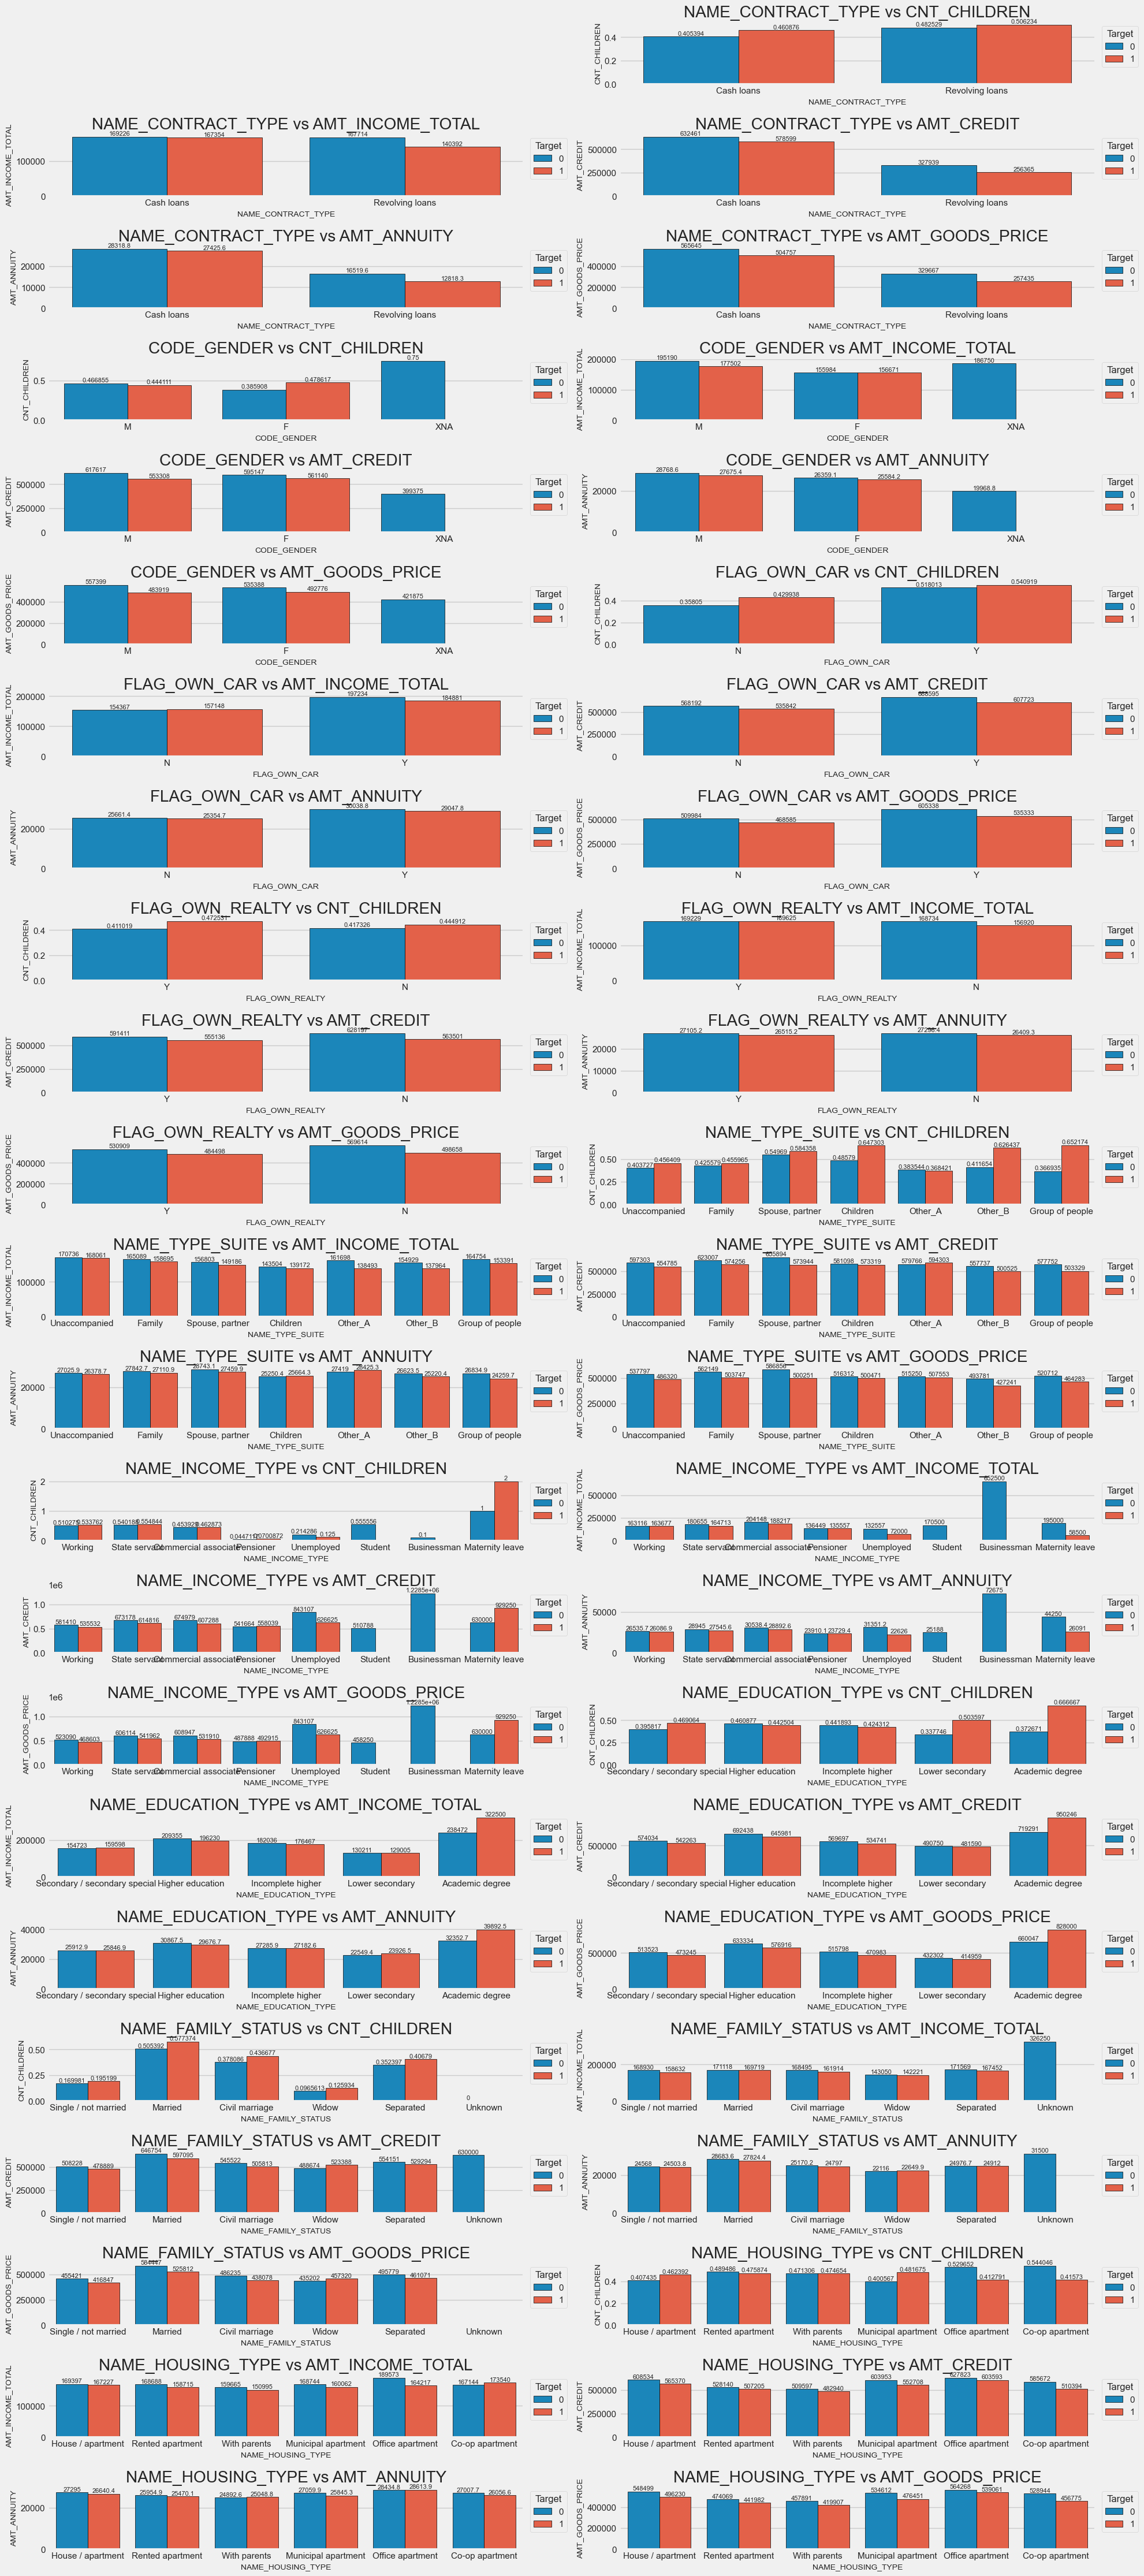

In [310]:
n_rows = 26
n_cols = 2

# Hitung total subplot yang akan digunakan
total_plots = n_rows * n_cols

plt.figure(figsize=(20,50))
for i, col_i in enumerate(df_cats.columns):
    if(col_i != 'TARGET'):
        for j,col_j in enumerate(df_nums.columns):

            #tentukan index subplot
            plot_index = i * len(df_nums.columns) + j

            #jika sudah melewati total plot, keluar dari loop
            if plot_index >= total_plots:
                break

            #membuat subplots
            
            ax = plt.subplot(n_rows, n_cols, plot_index + 1) # subplot index dimulai dari 1
            # fig, ax = plt.subplots(figsize=(15,5))
            sns.barplot(x=col_i, y=col_j, data = df_master, hue='TARGET', edgecolor='black', ci=None, ax=ax)
            for cont in ax.containers:
                ax.bar_label(cont, size=8)
            ax.set_title(f'{col_i} vs {col_j}')  # Judul untuk setiap subplot
            ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1), title='Target')
            ax.set_xlabel(col_i, fontsize=10)
            ax.set_ylabel(col_j, fontsize=10)


plt.tight_layout()
plt.show()

TARGET yang bernilai 0 lebih tinggi tipis dibandingkan dengan yang bernilai 1 yaitu hubungan antara :
- NAME_CONTRACT_TYPE & AMT_INCOME_TOTAL
- NAME_CONTRACT_TYPE & AMT_CREDIT
- NAME_CONTRACT_TYPE & AMT_ANNUITY
- NAME_CONTRACT_TYPE & AMT_GOODS_PRICE
- CODE_GENDER & AMT_CREDIT
- CODE_GENDER & AMT_ANNUITY
- CODE_GENDER & AMT_GOODS_PRICE
- FLAG_OWN_CAR & AMT_INCOME_TOTAL
- FLAG_OWN_CAR & AMT_CREDIT
- FLAG_OWN_CAR & AMT_ANNUITY
- FLAG_OWN_CAR & AMT_GOODS_PRICE
- FLAG_OWN_REALTY & AMT_CREDIT
- FLAG_OWN_REALTY & AMT_ANNUITY
- FLAG_OWN_REALTY & AMT_GOODS_PRICE
- NAME_TYPE_SUITE & AMT_INCOME_TOTAL
- NAME_TYPE_SUITE & AMT_GOODS_PRICE
- NAME_INCOME_TYPE & AMT_INCOME_TOTAL
- NAME_INCOME_TYPE & AMT_ANNUITY
- NMAE_FAMILY_STATUS & AMT_INCOME_TOTAL
- NAME_HOUSING_TYPE & AMT_CREDIT
- NAME_HOUSING_TYPE & AMT_GOODS_PRICE

TARGET yang bernilai 0 lebih tinggi tipis dibandingkan dengan yang bernilai 1 yaitu hubungan antara :
- NAME_CONTRACT_TYPE & CNT_CHILDREN
- FLAG_OWN_CAR & CNT_CHILDREN
- FLAG_OWN_REALTY & CNT_CHILDREN
- NAME_FAMILY_STATUS & CNT_CHILDREN

Insight lainnya :
- NAME_CONTRACT_TYPE & AMT_CREDIT : Cash loans lebih banyak nilainya dibandingkan dengan Revolving loans.
- NAME_CONTRACT_TYPE & AMT_ANNUITY : Cash loans lebih banyak nilainya dibandingkan dengan Revolving loans.
- NAME_CONTRACT_TYPE & AMT_GOODS_PRICE : Cash loans lebih banyak nilainya dibandingkan dengan Revolving loans.
- CODE_GENDER & CNT_CHILDREN : TARGET yang bernilai 0 lebih tinggi tipis dibandingkan dengan yang bernilai 1, kecuali yang kategori F. XNA memiliki nilai yang lebih tinggi dibandingkan dengan kategori lainnya.
- CODE_GENDER & AMT_INCOME_TOTAL : TARGET yang bernilai 0 lebih tinggi tipis dibandingkan dengan yang bernilai 1, kecuali yang kategori N.
- FLAG_OWN_REALTY & AMT_INCOME_TOTAL : TARGET yang bernilai 0 lebih tinggi tipis dibandingkan dengan yang bernilai 1, kecuali yang kategori Y.
- NAME_TYPE_SUITE & CNT_CHILDREN : TARGET yang bernilai 1 lebih tinggi tipis dibandingkan dengan yang bernilai 0, kecuali yang kategori Other_A.
- NAME_TYPE_SUITE & AMT_CREDIT : TARGET yang bernilai 0 lebih tinggi tipis dibandingkan dengan yang bernilai 0, kecuali yang kategori Other_A.
- NAME_TYPE_SUITE & AMT_ANNUITY : TARGET yang bernilai 0 lebih tinggi tipis dibandingkan dengan yang bernilai 0, kecuali yang kategori Children dan Other_A.
- NAME_INCOME_TYPE & CNT_CHILDREN : TARGET yang bernilai 1 lebih tinggi tipis dibandingkan dengan yang bernilai 0, kecuali yang kategori Unemployed, Student dan Businessman. Maternity leave memiliki nilai yang lebih tinggi dibandingkan dengan kategori lainnya.
- NAME_INCOME_TYPE & AMT_CREDIT : TARGET yang bernilai 0 lebih tinggi tipis dibandingkan dengan yang bernilai 0, kecuali yang kategori Pensioner dan Maternity leave.
- NAME_INCOME_TYPE & AMT_GOODS_PRICE : TARGET yang bernilai 0 lebih tinggi tipis dibandingkan dengan yang bernilai 0, kecuali yang kategori Pensioner dan Maternity leave.
- NAME_EDUCATION_TYPE & CNT_CHILDREN : TARGET yang bernilai 1 lebih tinggi dibandingkan dengan yang bernilai 0 yaitu Secondary /secondary special, Lower secondary dan Academic degree.
- NAME_EDUCATION_TYPE & AMT_INCOME_TOTAL : TARGET yang bernilai 1 lebih tinggi dibandingkan dengan yang bernilai 0 hanya Secondary /secondary special dan Academic degree.
- NAME_EDUCATION_TYPE & AMT_CREDIT : TARGET yang bernilai 1 lebih tinggi dibandingkan dengan yang bernilai 0 hanya Academic degree.
- NAME_EDUCATION_TYPE & AMT_ANNUITY : TARGET yang bernilai 0 lebih tinggi dibandingkan dengan yang bernilai 0 hanya Higher education.
- NAME_EDUCATION_TYPE & AMT_GOODS_PRICE : TARGET yang bernilai 1 lebih tinggi dibandingkan dengan yang bernilai 0 hanya Academic degree.
- NAME_FAMILY_STATUS & AMT_CREDIT : TARGET yang bernilai 0 lebih tinggi dibandingkan dengan yang bernilai 0 hanya Widow.
- NAME_FAMILY_STATUS & AMT_ANNUITY : TARGET yang bernilai 0 lebih tinggi dibandingkan dengan yang bernilai 0 hanya Widow.
- NAME_FAMILY_STATUS & AMT_GOODS_PRICE : TARGET yang bernilai 0 lebih tinggi dibandingkan dengan yang bernilai 0 hanya Widow.
- NAME_HOUSING_TYPE & CNT_CHILDREN : TARGET yang bernilai 1 lebih tinggi dibandingkan dengan yang bernilai 0 yaitu House / apartment, With parents dan Municipal apartment.
- NAME_HOUSING_TYPE & AMT_INCOME_TOTAL : TARGET yang bernilai 0 lebih tinggi dibandingkan dengan yang bernilai 0 hanya Co-op apartment.
- NAME_HOUSING_TYPE & AMT_ANNUITY : TARGET yang bernilai 1 lebih tinggi dibandingkan dengan yang bernilai 0 hanya Municipal apartment dan Co-op apartment.